<a href="https://colab.research.google.com/github/AmandinChyba/Project1-Fields-2022/blob/main/BIEM_attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax.numpy as jnp
import jax.random as jrandom
import numpy as np
import jax

import matplotlib.pyplot as plt
import time

In [32]:
# parametrized boundary
def boundary(t):
  x = (1 + jnp.sin(10*jnp.pi*t)/4) * jnp.cos(2*jnp.pi*t)
  y = (1 + jnp.sin(10*jnp.pi*t)/4) * jnp.sin(2*jnp.pi*t)
  return x,y

# boundary condition
def exact(x,y):
  return jnp.power(x,2) - jnp.power(y,2)

# compute the normal and curvature by differentiation
def differentiate(x,y):
  d1 = jnp.gradient(jnp.array([x,y]))
  d2 = jnp.gradient(d1[1])
  return d1[1], d2[1]

def thing(d1):
  #return jnp.sqrt(jnp.sum(jnp.power(d1[0],2) + jnp.power(d1[1],2)))
  return jnp.sqrt(jnp.power(d1[0],2) + jnp.power(d1[1],2))

In [53]:
# number of points
n = 100

# list of points
t = jnp.arange(n)/(n)
x,y = boundary(t)

# spacing of t
h = 1/(n-1)

# get the first and second derivative of the points on the boundary
d1, d2 = differentiate(x,y)

dl = thing(d1) #this is totaly wrong

# calculate the normal vector using the first derivative
xNormal = d1[1]
yNormal = -d1[0]

# calculate the curvature using the second derivative
r3 = jnp.power(jnp.power(d1[0],2) + jnp.power(d1[1],2), 1.5)
crossP = d1[0]*d2[1] - d1[1]*d2[0]
curvature = crossP / r3

# create the identity matrix
I = jnp.diag(jnp.array([-0.5]*n))

# calculate the integration kernel
i = jnp.arange(n).reshape((1,n)).transpose()
K = (xNormal * (x[i]-x) + yNormal * (y[i]-y)) / (2 * jnp.pi * (jnp.power(x[i]-x, 2) + jnp.power(y[i]-y, 2)))
K = jnp.nan_to_num(K, 0)
K = jnp.add(K, jnp.diag(- curvature * dl / (4 * jnp.pi)))

# solve for the charge density
a = I+K
b = exact(x,y)
chargeD = jnp.linalg.solve(a, b)

# generate points to sample
nGrid = 100
xPoints = x * jnp.array([jnp.arange(nGrid)/nGrid]).transpose()
yPoints = xPoints * y/x
xPoints = jnp.array([jnp.ravel(xPoints)]).transpose()
yPoints = jnp.array([jnp.ravel(yPoints)]).transpose()

# compute the solution
integral = (xNormal * (xPoints-x) + yNormal * (yPoints-y)) * chargeD / (2 * jnp.pi * (jnp.power(xPoints-x, 2) + jnp.power(yPoints-y, 2)))
soln = jnp.sum(integral, axis=1)
#print(boundaryCond(xPoints,yPoints).transpose())

# compute error
error = jnp.abs(soln - exact(xPoints, yPoints).transpose())

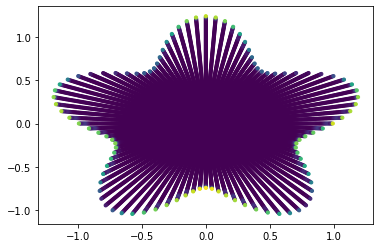

In [54]:
plt.scatter(xPoints, yPoints, c=error, s=10)

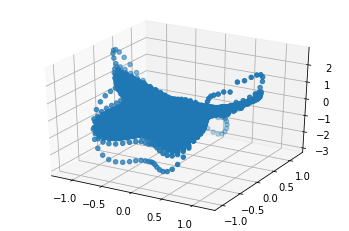

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xPoints, yPoints, soln)
#plt.scatter(x,y)
#plt.scatter(xPoints,yPoints)